<a href="https://colab.research.google.com/github/prab-tri/BigDataApps/blob/master/ICP05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
#Import required libraries 
import pandas as pd
import numpy as np
import re
import string
import nltk
import keras


#from numpy import array
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
#Plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
# Global Parameters
stop_words = set(stopwords.words('english'))
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [195]:
#get the Data used and store in variable Data
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

In [196]:
#checking the null values 
Data.isnull().values.any()

False

In [197]:
#view of top 5 and bottom 5 rows of data
Data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [198]:
#counting distinct vlaue on column 'label'
Data.groupby(['label']).count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


In [199]:
#Data type of each column
Data.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [200]:
#view of a tweet
Data['tweet'][5]

'[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  '

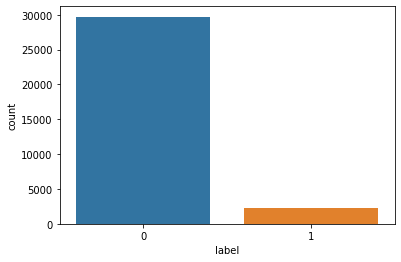

In [201]:
sns.countplot(x='label', data=Data)

In [202]:
#deleting id column
del Data['id']

In [203]:
#review the data
Data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


**Define a function to preprocess the tweets.**

Change in lower case.

Remove the urls from tweet.

Remove user refernces and '#' from tweet.

Remove punctuations, multiple spaces and single character.

Remove stopwords after converting text in list.

Remove numeric values.


In [204]:
def preprocess_tweet_text(tweet):
    '''
    input - type str
    return  - type str
    '''
    #change in lower case
    tweet.lower()
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Removing multiple spaces
    tweet = re.sub(r'\s+', ' ', tweet)
    # Single character removal
    tweet = re.sub(r"\s+[a-zA-Z]\s+", ' ', tweet)
    #converting in list
    tweet = list(tweet.split(" "))
    # Remove stopwords
    filtered_words = [w for w in tweet if not w in stop_words]
    #print(filtered_words)
    
    #Remove numeric ones
    alpha_words = [w for w in filtered_words if w.isalpha()]
    return " ".join(alpha_words)

In [217]:
#creating a list to store clean tweets after passing each to preprocess_tweet_text function.
X = []
sentences = list(Data['tweet'])
for sen in sentences:
    X.append(preprocess_tweet_text(sen))

In [219]:
print('Before processing : {}'.format( Data['tweet'][5]))

Before processing : [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  


In [218]:
print('After cleaning the tweet : {}'.format(X[5]))

After cleaning the tweet : huge fan fare big talking leave chaos pay disputes get allshowandnogo


In [221]:
#Classifier storing it on array
y = np.array(list(Data['label']))

In [234]:
#splitting data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [235]:
print('# of training samples: {}'.format(len(X_train)))
print('# of testing samples: {}'.format(len(X_test)))
print('# classification on sentiments: {}'.format(np.unique(y)))

# of training samples: 19177
# of testing samples: 12785
# classification on sentiments: [0 1]


In [236]:
#Setting size of vocab for Tokenizer and Converts a list of sequences into a Numpy matrix in binary mode.
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_matrix(X_train, mode = 'binary')
X_test = tokenizer.texts_to_matrix(X_test, mode= 'binary')


In [243]:
#Converting output to categorical value, We know we have two category here.
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [244]:
print(X_train.shape)

(19177, 5000)


In [255]:
len(tokenizer.word_index)

27194

In [256]:
#defining a  model using keras library using 2 dense and 2 activation function
max_words=5000
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [258]:
#compile and builing the model
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])
print(model.metrics_names)

[]


In [259]:
#it prints model summary
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               2560512   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 2,561,538
Trainable params: 2,561,538
Non-trainable params: 0
_________________________________________________________________
None


In [260]:
#Training the model
batch_size = 32
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1,validation_split=0.1)
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose = 1)
print("Test Loss: {}".format(score[0]))
print("Test Accuracy: {}".format(score[1]))

Epoch 1/10
540/540 [==============================] - 9s 17ms/step - loss: 0.1861 - accuracy: 0.9429 - val_loss: 0.1313 - val_accuracy: 0.9567
Epoch 2/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0896 - accuracy: 0.9692 - val_loss: 0.1296 - val_accuracy: 0.9588
Epoch 3/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0501 - accuracy: 0.9833 - val_loss: 0.1457 - val_accuracy: 0.9604
Epoch 4/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.1655 - val_accuracy: 0.9578
Epoch 5/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0189 - accuracy: 0.9944 - val_loss: 0.1748 - val_accuracy: 0.9567
Epoch 6/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0130 - accuracy: 0.9963 - val_loss: 0.1889 - val_accuracy: 0.9567
Epoch 7/10
540/540 [==============================] - 9s 17ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.2108 - val_accuracy: 0.9567

In [263]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


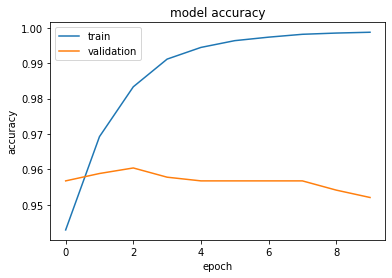

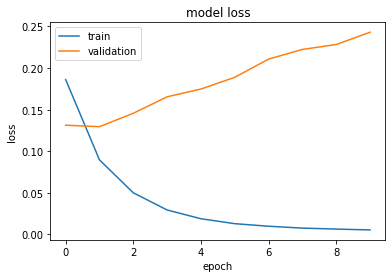

In [266]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()